In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
N=50000
a=np.array(sorted(np.random.normal(0,1,N)))
b=np.array(sorted(np.random.normal(0,1,N)+1))

In [13]:
np.random.normal(0,1,N)

array([ 0.56433412, -0.26355008, -1.04476105, ..., -0.15541531,
       -1.0998251 , -0.06169667])

In [14]:
x,y,z=0,1,0.7

c=a+(b-a)/(y-x)*(z-x)


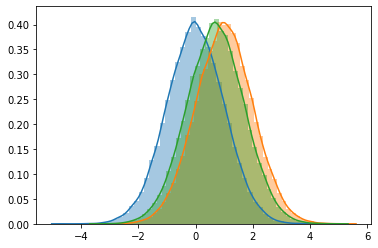

In [15]:
sns.distplot(a)
sns.distplot(b)
sns.distplot(c)

In [16]:
#determinant of matrix a
def det(a):
    return a[0][0]*a[1][1]*a[2][2] + a[0][1]*a[1][2]*a[2][0] + a[0][2]*a[1][0]*a[2][1] - a[0][2]*a[1][1]*a[2][0] - a[0][1]*a[1][0]*a[2][2] - a[0][0]*a[1][2]*a[2][1]

#unit normal vector of plane defined by points a, b, and c
def unit_normal(a, b, c):
    x = det([[1,a[1],a[2]],
             [1,b[1],b[2]],
             [1,c[1],c[2]]])
    y = det([[a[0],1,a[2]],
             [b[0],1,b[2]],
             [c[0],1,c[2]]])
    z = det([[a[0],a[1],1],
             [b[0],b[1],1],
             [c[0],c[1],1]])
    magnitude = (x**2 + y**2 + z**2)**.5
    return (x/magnitude, y/magnitude, z/magnitude)

#dot product of vectors a and b
def dot(a, b):
    return a[0]*b[0] + a[1]*b[1] + a[2]*b[2]

#cross product of vectors a and b
def cross(a, b):
    x = a[1] * b[2] - a[2] * b[1]
    y = a[2] * b[0] - a[0] * b[2]
    z = a[0] * b[1] - a[1] * b[0]
    return (x, y, z)

#area of polygon poly
def area(poly):
    if len(poly) < 3: # not a plane - no area
        return 0

    total = [0, 0, 0]
    for i in range(len(poly)):
        vi1 = poly[i]
        if i is len(poly)-1:
            vi2 = poly[0]
        else:
            vi2 = poly[i+1]
        prod = cross(vi1, vi2)
        total[0] += prod[0]
        total[1] += prod[1]
        total[2] += prod[2]
    result = dot(total, unit_normal(poly[0], poly[1], poly[2]))
    return abs(result/2)

In [5]:
poly=[[ -0.025000000372529, 0.0551254935562611, -0.0265991650521755 ],\
      [ -0.025000000372529, 0.0159665141254663, 0.0514875464141369 ],\
        [ -0.025000000372529, -0.0435987487435341, -0.014911837875843 ]]
print(area(poly),"um^2")

0.003625693809347724 um^2


In [7]:
print(area(poly)*1e-6,"cm^2")

3.6256938093477238e-09 cm^2


In [10]:
np.pi

3.141592653589793

In [19]:
a=np.arange(40)
np.searchsorted(a,3.5)

4

In [38]:
a=np.array([0.1,0.2,0.3])
cum=np.cumsum(a)

cum=cum/cum[-1]

print(cum)

print(np.searchsorted(cum,0.9))

[0.16666667 0.5        1.        ]
2
